# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [17]:
import torch
import numpy as np
print(torch.__version__)

2.0.1


## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [3]:
x = torch.zeros(8, 8)
x[0] = torch.Tensor([-4., -3., -2., -6., -5., -2., -3., -4.])
x[1] = torch.ones(8)
x[-2] = -torch.ones(8)
x[-1] = torch.Tensor([4., 3., 2., 6., 5., 2., 3., 4.])
x

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [4]:
a = torch.arange(2,21,2)
b = torch.arange(3,22,2)
a * b

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [5]:
a = torch.arange(1,111)
a.reshape(-1,10)[:,:7]

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [6]:
matrix = torch.Tensor([[0,1],[2,3]])
n = 4
m = 5
matrix.repeat(n,m)[:n,:m]

tensor([[0., 1., 0., 1., 0.],
        [2., 3., 2., 3., 2.],
        [0., 1., 0., 1., 0.],
        [2., 3., 2., 3., 2.]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

In [7]:
t = torch.rand(4,7) * 20
print(t)

min_val = torch.min(t)
max_val = torch.max(t)

a = 1.0 / (max_val - min_val)
b = -a * min_val

a = 1.0 / (max_val - min_val)
b = -a * min_val

normalized_t = a * t + b

print(normalized_t)

tensor([[16.8868, 13.9156, 10.0719, 14.9929, 15.8311, 11.7245, 16.6283],
        [10.5652,  3.3066,  3.5868, 18.2790,  0.2333, 19.1000, 19.9277],
        [ 6.7508,  0.2250,  2.0223,  0.3830, 16.5891,  4.3015, 15.8588],
        [ 5.8485,  5.0217,  2.9113, 12.1101, 18.6919,  1.8113,  7.9611]])
tensor([[8.4566e-01, 6.9486e-01, 4.9978e-01, 7.4954e-01, 7.9208e-01, 5.8365e-01,
         8.3254e-01],
        [5.2481e-01, 1.5641e-01, 1.7063e-01, 9.1632e-01, 4.2262e-04, 9.5799e-01,
         1.0000e+00],
        [3.3122e-01, 0.0000e+00, 9.1222e-02, 8.0195e-03, 8.3055e-01, 2.0690e-01,
         7.9348e-01],
        [2.8542e-01, 2.4345e-01, 1.3634e-01, 6.0322e-01, 9.3727e-01, 8.0514e-02,
         3.9264e-01]])


1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [8]:
ar1 = torch.randint(0,11, size = (4,7))
ar2 = torch.randint(0,11, size = (4,7))

torch.max(ar1,ar2)

tensor([[ 3,  8,  2,  8, 10,  2,  6],
        [ 9,  7, 10,  5,  3,  8,  9],
        [ 7,  8, 10,  6,  8,  6,  9],
        [ 9,  6,  9, 10,  4,  3,  9]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [9]:
a = torch.randint(0,101, size = (20,))
print(a)
a.topk(2)

tensor([97,  1, 32, 95, 39, 14, 36,  7, 39, 88, 88, 13, 74, 11, 58, 40, 19, 93,
        51, 27])


torch.return_types.topk(
values=tensor([97, 95]),
indices=tensor([0, 3]))

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [10]:
import torch

row_vector = torch.arange(1, 8).reshape(1, -1)

print(row_vector)

column_vector = torch.arange(0, 110, 10).reshape(-1, 1)

print(column_vector)

result = row_vector + column_vector

print(result)


tensor([[1, 2, 3, 4, 5, 6, 7]])
tensor([[  0],
        [ 10],
        [ 20],
        [ 30],
        [ 40],
        [ 50],
        [ 60],
        [ 70],
        [ 80],
        [ 90],
        [100]])
tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [11]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])

a_2d - b_1d[:,None]

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [12]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])

torch.argwhere(a == b)

tensor([[1],
        [3],
        [5],
        [7]])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [13]:
torch.flip(torch.arange(9).view(3,3), [1,0])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [14]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a >= 5) & (a <= 10)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [18]:
a = torch.tensor(np.arange(9).reshape(3,3))

a = a[:, [1, 0, 2]]

a

tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])

In [19]:
a = torch.tensor(np.arange(9).reshape(3,3))

a[:,0].cop , a[:,1] =  a[:,1], a[:,0]

a

tensor([[0, 0, 2],
        [3, 3, 5],
        [6, 6, 8]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [20]:
a = torch.randint(0,11, size = (8,10))
print(a)

print(torch.sum(a, 1))
print(torch.argwhere(torch.sum(a, 1) == min(torch.sum(a, 1))))

tensor([[ 2, 10,  2,  8,  0,  8,  0,  9, 10,  4],
        [ 5,  2,  6,  5,  6,  8,  8,  9,  4,  3],
        [ 0,  4,  1,  3,  3,  9,  9,  8,  0,  2],
        [ 4,  6,  4,  5,  2,  7,  7,  9,  2, 10],
        [ 5,  8,  7,  9,  1,  7,  2,  7,  8,  7],
        [10,  1,  5,  0,  9,  3, 10,  1, 10,  7],
        [ 5,  6,  4,  9,  0, 10,  4,  4,  3,  5],
        [ 6,  6,  4,  7,  6, 10,  6,  0,  7,  5]])
tensor([53, 56, 39, 56, 61, 56, 50, 57])
tensor([[2]])


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [21]:
a = torch.randint(0,100, size = (20,))
print(a)

a[a < 30] = 30 
a[a > 70] = 70

print(a)

tensor([67, 12, 80,  1, 83, 34, 89, 12, 34,  7, 44, 58, 69,  7, 13, 10, 52, 71,
        22, 89])
tensor([67, 30, 70, 30, 70, 34, 70, 30, 34, 30, 44, 58, 69, 30, 30, 30, 52, 70,
        30, 70])


1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [22]:
a = torch.randint(0,10, size = (30,3))
b = torch.randint(0,10, size = (30,3))

print(a)
print(b)

sum(a[a > b]) + sum(b[a > b])


tensor([[2, 3, 0],
        [7, 3, 9],
        [0, 8, 5],
        [7, 7, 7],
        [1, 5, 3],
        [3, 4, 2],
        [7, 4, 0],
        [5, 4, 0],
        [0, 7, 1],
        [1, 6, 0],
        [4, 9, 2],
        [7, 1, 3],
        [8, 7, 2],
        [1, 0, 6],
        [2, 4, 2],
        [0, 3, 7],
        [3, 9, 1],
        [6, 5, 9],
        [5, 1, 9],
        [0, 8, 8],
        [7, 6, 8],
        [2, 3, 9],
        [3, 7, 1],
        [9, 1, 1],
        [4, 4, 8],
        [0, 7, 2],
        [8, 7, 7],
        [4, 9, 3],
        [0, 7, 7],
        [1, 9, 5]])
tensor([[6, 4, 0],
        [0, 0, 5],
        [5, 0, 1],
        [3, 5, 6],
        [5, 5, 0],
        [1, 8, 0],
        [6, 0, 7],
        [6, 0, 7],
        [4, 1, 2],
        [5, 6, 8],
        [4, 9, 0],
        [7, 2, 6],
        [4, 9, 3],
        [1, 0, 5],
        [5, 9, 2],
        [2, 6, 2],
        [4, 6, 4],
        [5, 6, 5],
        [4, 7, 6],
        [5, 0, 1],
        [5, 4, 4],
        [2, 6, 4],
        [4,

tensor(366)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [23]:
a = torch.randint(0,11, size = (20,20))
a

tensor([[ 5,  9,  9,  9,  0,  9,  7,  6, 10,  9,  5,  4,  9,  1,  9,  7,  5,  6,
          9,  6],
        [ 4,  0,  4,  9,  5,  0,  7, 10,  1,  7, 10,  2,  1,  5,  6,  6,  3,  4,
          6,  2],
        [ 0,  4,  7,  0,  2,  7,  6, 10, 10,  6,  0,  0,  9, 10,  9,  7,  0,  9,
          0,  6],
        [ 5, 10,  5,  6, 10, 10,  2,  7,  9,  8,  7,  3,  5,  9,  6,  8,  9,  4,
          4, 10],
        [ 5,  2,  7,  4,  6,  6,  2,  1,  6,  8, 10,  5,  2,  4,  4,  4,  3,  1,
          9,  7],
        [ 2,  0,  3, 10,  5,  8, 10,  6,  3,  3,  7,  3,  6,  1, 10,  6,  1,  7,
          8,  9],
        [10,  0,  6,  1,  5, 10,  8,  7,  4,  6,  6,  4, 10,  0,  9,  1,  3,  1,
          7,  9],
        [ 5, 10,  4,  6,  5,  0, 10,  4,  2,  8,  3, 10,  4,  4,  0,  5,  0,  1,
          9,  0],
        [ 4,  1,  4,  3,  5,  5,  7,  0,  7,  8,  5,  8,  9,  8,  9,  6,  2,  4,
          7,  9],
        [ 8,  6,  5,  4,  4,  3,  4,  3,  1,  2,  5,  5,  5,  9,  4,  8,  4,  2,
          3,  3],
        [1

In [24]:
diagonal_elements = a.diagonal(offset=1).flatten()
print(diagonal_elements)

tensor([ 9,  4,  0, 10,  6, 10,  7,  2,  8,  5,  9,  2,  5,  2,  7,  0,  3,  1,
         6])


1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [25]:
ar1 = torch.randint(0,11, size = (5,10))
ar2 = torch.randint(0,11, size = (5,10))

print(ar1)
print(ar2)

ar1[ar1 == ar2] = ar1[ar1 == ar2]*2

print(ar1)

tensor([[ 7,  4,  2,  2,  7,  5,  1,  3,  4,  5],
        [ 8,  8,  4,  9,  0,  2,  9,  7,  0,  2],
        [ 6,  9,  1,  7, 10,  3,  9,  0,  6,  0],
        [ 3,  3,  4,  9,  2,  2,  1,  2,  0,  4],
        [ 3, 10,  8,  7,  2,  9,  9,  8,  9,  5]])
tensor([[ 7,  7,  3,  5,  4,  2,  8,  5,  9,  0],
        [ 4,  0, 10,  9,  6,  6,  2,  7,  1, 10],
        [ 9,  2,  6,  1,  4,  2,  7,  2,  9,  0],
        [ 6,  9,  7,  4, 10, 10,  0, 10,  3,  3],
        [ 3,  7,  1,  3,  0,  5,  2,  3, 10,  0]])
tensor([[14,  4,  2,  2,  7,  5,  1,  3,  4,  5],
        [ 8,  8,  4, 18,  0,  2,  9, 14,  0,  2],
        [ 6,  9,  1,  7, 10,  3,  9,  0,  6,  0],
        [ 3,  3,  4,  9,  2,  2,  1,  2,  0,  4],
        [ 6, 10,  8,  7,  2,  9,  9,  8,  9,  5]])


1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [26]:
ar1 = torch.randint(0,11, size = (4,7))
ar2 = torch.randint(0,11, size = (4,7))
ar3 = torch.randint(0,11, size = (4,7))

print(ar1)
print(ar2)
print(ar3)

ar1[(ar1 > ar2) & (ar1 < ar3)] = 0

print(ar1)

tensor([[ 5,  1,  4, 10,  3,  9,  4],
        [ 4,  2,  7, 10,  9, 10,  8],
        [ 2,  4,  5,  3,  7,  8,  9],
        [ 1,  7,  0,  6,  6,  0,  6]])
tensor([[ 5,  7,  4,  2,  8,  2,  1],
        [ 4, 10,  2,  8,  2,  4,  3],
        [ 5,  2,  6,  2,  9,  8,  0],
        [ 0,  9,  1, 10,  8,  4,  0]])
tensor([[ 3,  9,  5,  9,  4,  0, 10],
        [ 3,  1,  3,  6,  7,  5,  0],
        [10,  1,  2,  1,  6, 10,  9],
        [ 2,  9,  6,  8,  1,  6,  5]])
tensor([[ 5,  1,  4, 10,  3,  9,  0],
        [ 4,  2,  7, 10,  9, 10,  8],
        [ 2,  4,  5,  3,  7,  8,  9],
        [ 0,  7,  0,  6,  6,  0,  6]])


1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [73]:
ar1 = torch.randint(0,21, size = (20,5))
print(ar1)
print(sum(torch.max(ar1, dim = 1)[0] == ar1[:,0]) >= 5)
print(sum(torch.max(ar1, dim = 1)[0] == ar1[:,1]) >= 5)
print(sum(torch.max(ar1, dim = 1)[0] == ar1[:,2]) >= 5)
print(sum(torch.max(ar1, dim = 1)[0] == ar1[:,3]) >= 5)


tensor([[ 3, 18, 20, 18, 10],
        [14, 15, 15,  3, 11],
        [ 6, 19,  7, 16,  0],
        [ 5, 14, 14,  8, 20],
        [ 2,  0, 12, 20,  5],
        [20, 20,  0, 13,  8],
        [ 9,  5, 14,  4, 11],
        [13,  6, 16, 19, 10],
        [14,  5,  8, 20,  6],
        [16,  7, 11, 19, 12],
        [10,  6,  9,  7,  6],
        [ 3, 18,  3, 11, 18],
        [ 9, 14, 15,  6,  7],
        [13,  0, 20, 12, 10],
        [19, 20, 16,  7,  8],
        [ 3, 15, 15, 19, 18],
        [ 1,  6,  4, 16,  7],
        [11, 18,  4, 11, 15],
        [16,  9, 12, 10, 19],
        [15, 16, 12, 14,  9]])
tensor(False)
tensor(True)
tensor(True)
tensor(True)


In [79]:
ar1 = torch.randint(0, 21, size=(20, 5))
max_values, _ = torch.max(ar1, dim=1)
print(max_values)
print(max_values.unsqueeze(1))
column_counts = torch.sum(ar1 == max_values.unsqueeze(1), dim=0)
columns_with_at_least_5_max_values = column_counts >= 5
print(columns_with_at_least_5_max_values)

tensor([14, 18, 18, 19, 20, 18, 14, 20, 12, 13, 16, 14, 19, 14, 13, 20, 12, 20,
        14,  9])
tensor([[14],
        [18],
        [18],
        [19],
        [20],
        [18],
        [14],
        [20],
        [12],
        [13],
        [16],
        [14],
        [19],
        [14],
        [13],
        [20],
        [12],
        [20],
        [14],
        [ 9]])
tensor([False,  True,  True,  True, False])


1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [118]:
ar1 = torch.rand(4,7)
print(ar1)
max_num = torch.max(ar1)
max_indices = torch.where(ar1 == max_num)


row_indices, col_indices = int(max_indices[0]), int(max_indices[1])

ar1[row_indices :, col_indices: ] = 0
ar1[row_indices, col_indices] = max_num

print(ar1)


tensor([[0.9521, 0.6537, 0.5252, 0.0219, 0.8804, 0.8012, 0.3197],
        [0.8439, 0.1892, 0.2578, 0.5689, 0.7407, 0.0434, 0.7956],
        [0.2129, 0.9656, 0.1814, 0.5674, 0.0439, 0.0751, 0.9908],
        [0.2982, 0.8016, 0.0046, 0.4452, 0.9946, 0.5526, 0.2546]])
tensor([[0.9521, 0.6537, 0.5252, 0.0219, 0.8804, 0.8012, 0.3197],
        [0.8439, 0.1892, 0.2578, 0.5689, 0.7407, 0.0434, 0.7956],
        [0.2129, 0.9656, 0.1814, 0.5674, 0.0439, 0.0751, 0.9908],
        [0.2982, 0.8016, 0.0046, 0.4452, 0.9946, 0.0000, 0.0000]])


1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [173]:
ar1 = torch.randint(1,7 , size = (6,))

print(ar1)

final_ar1 = torch.zeros(size = (ar1.shape[0], torch.max(ar1)  + 1))
final_ar1[torch.arange(ar1.shape[0]),ar1 ] = 1
print(final_ar1[:,1:])


tensor([4, 6, 1, 3, 1, 4])
tensor([[0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]])


1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [300]:
ar1 = torch.randint(1,100 , size = (20,))
print(ar1)
values , counts = ar1.unique(return_counts = True)
print(values)
mask = counts == max(counts)

print("Частые значения:", values[mask])
max_indices = torch.nonzero(ar1 == values[mask]).squeeze()
print("Индексы максимальных значений:", max_indices)

tensor([85, 84, 52, 86, 72, 34, 24, 42, 78, 15,  3, 97, 29, 22, 71, 60,  5, 22,
        28, 68])
tensor([ 3,  5, 15, 22, 24, 28, 29, 34, 42, 52, 60, 68, 71, 72, 78, 84, 85, 86,
        97])
Частые значения: tensor([22])
Индексы максимальных значений: tensor([13, 17])


## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [302]:
def f(x):
    return x * torch.sin(x)


In [303]:
num_points = 100000

# Интервал от 0 до 10
a = 0
b = 10
# Генерация случайных точек на интервале [a, b]
random_points = torch.rand(num_points) * (b - a) + a

# Вычисление значений функции в этих точках
function_values = f(random_points)

# Подсчет количества точек, где значение функции больше 0.5
count = torch.sum(function_values > 0.5)

# Расчет процента точек, на которых значение больше 0.5
percentage = (count / num_points) * 100

print(f"Приближенно на {percentage:.1f}% интервала [{a}, {b}] значение функции больше 0.5.")

Приближенно на 52.7% интервала [0, 10] значение функции больше 0.5.


1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [345]:
ar1 = torch.arange(2, 101)
print(ar1)

for i in range(1,len(ar1)):
    if i * i < len(ar1) + 2:
        ar1[i * i - 2::i] = 0

# Filter out the 0 values to get the prime numbers
primes = ar1[ar1.nonzero()]
print(primes.squeeze())

tensor([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])


1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [352]:
vector1 = torch.rand(size = (5,))
vector2 = torch.rand(size = (5,))

print(vector1, vector2)
res = torch.sqrt(sum((vector1 - vector2) ** 2))
print(res)

tensor([0.4348, 0.4948, 0.7236, 0.9457, 0.6019]) tensor([0.6379, 0.4815, 0.3522, 0.9396, 0.0330])
tensor(0.7092)


1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [372]:
matrix = torch.randint(0, 101, size = (20, 3))
print(matrix)
def vector_length(vector):
    return torch.norm(vector.float(), p=2)

vector_lengths = torch.norm(matrix.float(), p=2, dim=1)
print(vector_lengths)
_, indices = torch.sort(vector_lengths)

sorted_matrix = matrix[indices]

print("Отсортированная матрица:")
print(sorted_matrix)








tensor([[25,  7, 80],
        [81, 72, 53],
        [20,  5, 32],
        [17, 70, 69],
        [35,  5, 62],
        [40, 26, 18],
        [22, 49, 65],
        [85, 86, 20],
        [ 8, 89, 20],
        [42, 52, 97],
        [52, 83, 15],
        [47, 79, 28],
        [88, 25, 11],
        [89, 62, 35],
        [33, 11, 95],
        [69, 34, 42],
        [75, 43, 17],
        [72, 54, 33],
        [24, 23, 88],
        [58, 54, 32]])
tensor([ 84.1071, 120.6400,  38.0657,  99.7497,  71.3723,  50.9902,  84.3208,
        122.5602,  91.5696, 117.8007,  99.0858,  96.0937,  92.1412, 113.9737,
        101.1682,  87.6413,  88.1079,  95.8593,  94.0691,  85.4634])
Отсортированная матрица:
tensor([[20,  5, 32],
        [40, 26, 18],
        [35,  5, 62],
        [25,  7, 80],
        [22, 49, 65],
        [58, 54, 32],
        [69, 34, 42],
        [75, 43, 17],
        [ 8, 89, 20],
        [88, 25, 11],
        [24, 23, 88],
        [72, 54, 33],
        [47, 79, 28],
        [52, 83, 15],
 

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [397]:
ar1 = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
mask = (ar1[1:-1] > ar1[2:]) & (ar1[1:-1] > ar1[:-2] )
print(ar1[1:-1][mask])

tensor([7, 6])


1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [414]:
ar1 = np.random.rand(100)
ar1
a = float(input("Type number: "))
sub = np.abs(ar1 - a)
index = sub.argmin()
print(index)
print(ar1[index])

Type number: 0.5
90
0.5015188214278562


1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [419]:
A =  torch.Tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]])
B= torch.Tensor([[3, -1], [2, 1]])
C= torch.Tensor([[7, 21], [11, 8], [8, 4]])

A_inv = torch.linalg.inv(A)
B_inv = torch.linalg.inv(B)
X = -torch.matmul(torch.matmul(A_inv, C), B_inv) 
print(X)

tensor([[ 1.0000e+00, -1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])


1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [11]:
import torch

# Задаем векторы
a1 = torch.tensor([3, -3, 0, 7], dtype=torch.float32)
a2 = torch.tensor([2, 2, 4, 7], dtype=torch.float32)
a3 = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
a4 = torch.tensor([5, -4, 1, 3], dtype=torch.float32)

# Создаем матрицу из векторов
A = torch.stack([a1, a2, a3, a4])
B = torch.zeros(4)
# Решаем систему линейных уравнений A * X = 0
# Где X - это вектор неизвестных коэффициентов
X = torch.linalg.lstsq(A, B).solution

# Если все коэффициенты равны нулю, то система векторов линейно зависима
if torch.all(X == 0):
    print("Система векторов линейно зависима")
else:
    print("Система векторов линейно независима")


Система векторов линейно зависима


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

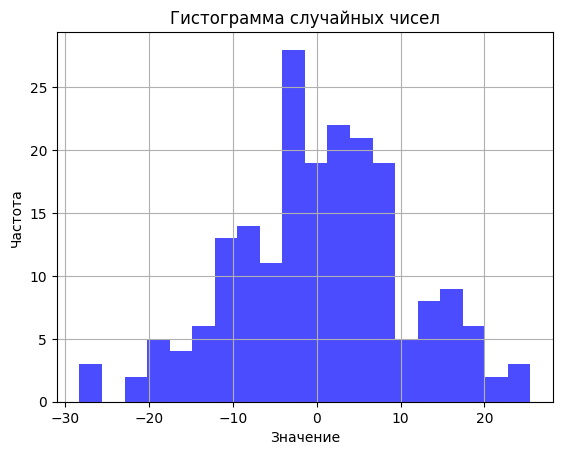

In [422]:
import matplotlib.pyplot as plt


sigma = 10
mu = 0
num_samples = 200
random_tensor = torch.normal(mean=mu, std=sigma, size=(num_samples,))

# Построим гистограмму с 20 бинами
plt.hist(random_tensor.numpy(), bins=20, color='blue', alpha=0.7)
plt.title('Гистограмма случайных чисел')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()





